In [1]:
!wget https://github.com/midas-network/COVID-19/archive/master.zip
!unzip master.zip

--2020-03-27 01:29:13--  https://github.com/midas-network/COVID-19/archive/master.zip
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo github.com (github.com)... 18.228.67.229
Conectando-se a github.com (github.com)|18.228.67.229|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://codeload.github.com/midas-network/COVID-19/zip/master [redirecionando]
--2020-03-27 01:29:13--  https://codeload.github.com/midas-network/COVID-19/zip/master
Resolvendo codeload.github.com (codeload.github.com)... 18.228.142.205
Conectando-se a codeload.github.com (codeload.github.com)|18.228.142.205|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: não especificada [application/zip]
Salvando em: “master.zip”

master.zip              [              <=>   ] 128,10M  3,33MB/s    em 38s     

2020-03-27 01:29:51 (3,39 MB/s) - “master.zip” salvo [134321112]

Archive:  master.zip
86857355a94652a157ec92

In [17]:
import pandas as pd
import numpy as np
import os

from shapely.geometry import Point, Polygon
import descartes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
root_path = 'COVID-19-master/data/cases/china/daily_cases_chinacdc_EN/'

recent = sorted(os.listdir(root_path))[-3]
path = os.path.join(root_path, recent)
df = pd.read_csv(path)
columns = ['Province', 'Suspeitos', 'Suspeitos Acumulados', 'Confirmados', 'Confirmados Acumulados', 'Mortes', 'Mortes Acumuladas']
df.columns= columns
print(df.shape)
display(df.head())
df.sum()

(34, 7)


,Province,Suspeitos,Suspeitos Acumulados,Confirmados,Confirmados Acumulados,Mortes,Mortes Acumuladas
0,Beijing,4,41,6,565,0,8
1,Tianjin,25,71,2,147,0,3
2,Hebei Province,0,0,0,319,0,6
3,Shanxi Province,0,0,1,135,0,0
4,Inner Mongolia Autonomous Region,4,5,12,89,0,1


Province                  BeijingTianjinHebei ProvinceShanxi ProvinceInn...
Suspeitos                                                                58
Suspeitos Acumulados                                                    159
Confirmados                                                             114
Confirmados Acumulados                                                81960
Mortes                                                                    6
Mortes Acumuladas                                                      3293
dtype: object

In [19]:
dados = {'Data': [], 'Confirmados': [], 'CA': [], 'Mortes': [], 'MA': []}
for k, csv in enumerate(sorted(os.listdir(root_path))[:-3]):
  
  path = os.path.join(root_path, csv)
  df = pd.read_csv(path)
  df = df.loc[:, ['province', 'Add Suspect', 'Cumulative Suspect', 'New diagnosis', 'Cumulative diagnosis', 'Added death', 'Cumulative death' ]] 
  df.columns = columns

  data = csv[:-4].split('-')
  dados['Data'].append(data[2][:2]+'/'+data[1]+'/'+data[0])

  dados['Confirmados'].append(df['Confirmados'].sum()) 
  dados['CA'].append(df['Confirmados Acumulados'].sum()) 
  dados['Mortes'].append(df['Mortes'].sum()) 
  dados['MA'].append(df['Mortes Acumuladas'].sum()) 

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

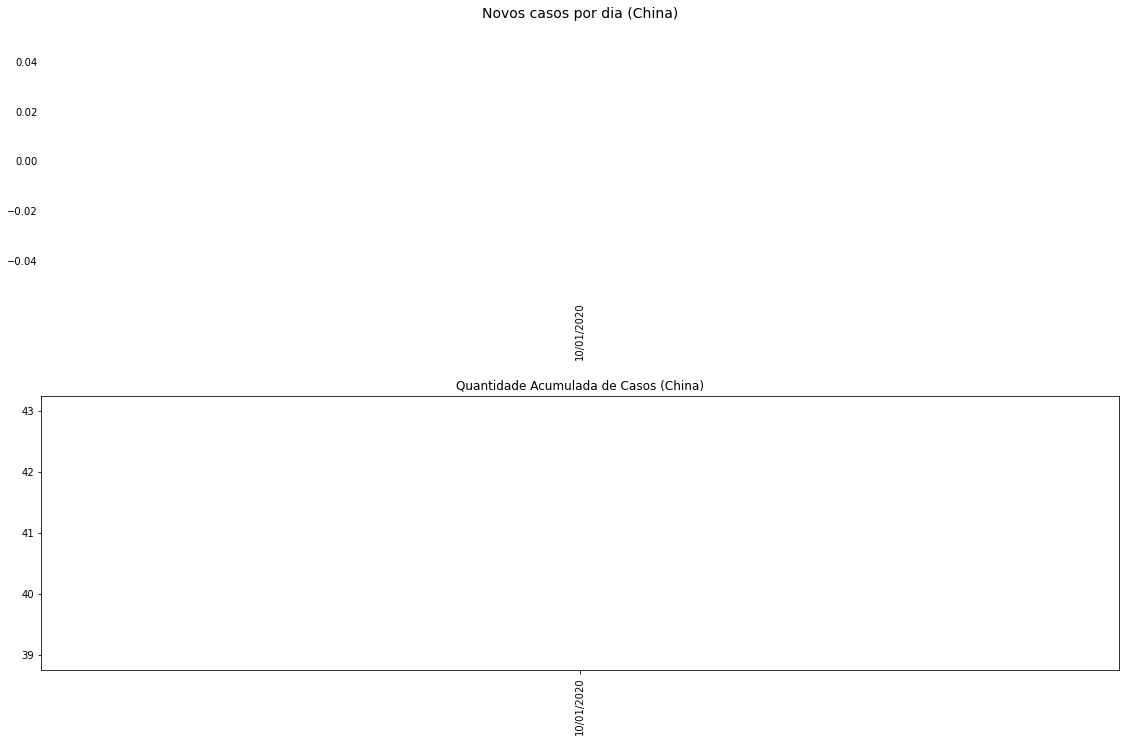

In [13]:
fig, ax = plt.subplots(2,1,figsize=(16, 10))
sns.lineplot(np.arange(len(dados['Data'])), dados['CA'], ax=ax[1], color='k', linestyle='dashed')
ax[1].set_title('Quantidade Acumulada de Casos (China)')
ax[1].set_xticks(np.arange(len(dados['Data'])))
ax[1].set_xticklabels(dados['Data'])

clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
sns.barplot(np.arange(len(dados['Data'])), dados['Confirmados'], palette=clrs, ax=ax[0], label=None)
ax[0].set_title('Novos casos por dia (China)', fontsize=14)
ax[0].set_xticks(np.arange(len(dados['Data'])))
ax[0].set_xticklabels(dados['Data'], rotation=90)
ax[0].set_frame_on(False)
ax[0].tick_params(axis='both', which='both', length=0)

fig.tight_layout(pad=2.0)
plt.xticks(rotation=90)
plt.savefig('china-pordia.svg', format='svg', dpi=300)
plt.show()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# os.mkdir('imgs/')

for i in range(10,len(dados['CA'])):
  fig, ax = plt.subplots(figsize=(18, 5))
  # sns.lineplot(np.arange(len(dados['Data']))[:i], dados['CA'][:i], ax=ax, color='k', linestyle='dashed', label="Valores acumulados")

  clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
  sns.barplot(np.arange(len(dados['Data']))[:i], dados['Confirmados'][:i], palette=clrs, ax=ax, label=None)

  plt.xticks(np.arange(len(dados['Data']))[:i], dados['Data'][:i], rotation=90, fontsize=12)
  plt.yticks(fontsize=12)
  plt.title('Novos casos por dia (China)', fontsize=16)
  ax.set_frame_on(False)
  ax.tick_params(axis='both', which='both', length=0)
  plt.grid(True, alpha=0.3)

  plt.legend(fontsize=14)
  plt.savefig('imgs/'+str(i)+'.png', dpi=100, format='png', bbox_inches='tight')
  plt.show()
  plt.close('all')

In [15]:
!zip -r imgs.zip imgs/

/usr/bin/sh: zip: comando não encontrado


In [16]:
import imageio

images = []
for filename in sorted(os.listdir('imgs')):
  file_path = os.path.join('imgs', filename)
  images.append(imageio.imread(file_path))

imageio.mimsave('data-covid19-china.gif', images, duration=1/2)

FileNotFoundError: [Errno 2] No such file or directory: 'imgs'